In [1]:
train_file_path=r"C:\Users\somit\Downloads\project_ineuron\machine_learning_02\Airfoil_prediction\artifact\data_ingestion\2022-11-22-08-17-45\ingested_data\train\airfoil_self_noise.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv(train_file_path)

In [4]:
df.shape
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Section side displacement thickness,Scaled Sound Pressure Level
0,3150,12.7,0.0254,39.6,0.013025,127.847
1,3150,4.0,0.3048,71.3,0.004978,121.775
2,5000,2.0,0.2286,55.5,0.003135,120.472
3,2000,5.4,0.1524,39.6,0.004850,124.647
4,8000,4.8,0.0254,55.5,0.000873,132.184


In [5]:
x=df.drop(columns="Scaled Sound Pressure Level" , axis=1)
y=df.iloc[: ,-1]

In [6]:
x.dtypes

Frequency                                int64
Angle of attack                        float64
Chord length                           float64
Free-stream velocity                   float64
Section side displacement thickness    float64
dtype: object

In [7]:
x=x.astype("float")

In [8]:
x.dtypes

Frequency                              float64
Angle of attack                        float64
Chord length                           float64
Free-stream velocity                   float64
Section side displacement thickness    float64
dtype: object

In [9]:
x.Frequency=(x.Frequency).astype('float')

In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(x,y , test_size=0.2)

In [11]:
x_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Section side displacement thickness
228,400.0,2.0,0.2286,31.7,0.003724
124,12500.0,0.0,0.1016,71.3,0.001211
1008,4000.0,12.7,0.0254,39.6,0.013025
215,1000.0,4.8,0.0254,31.7,0.000931
327,3150.0,0.0,0.2286,55.5,0.002293


In [12]:
x_train.dtypes

Frequency                              float64
Angle of attack                        float64
Chord length                           float64
Free-stream velocity                   float64
Section side displacement thickness    float64
dtype: object

In [13]:
from sklearn.base import BaseEstimator , TransformerMixin

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
import numpy as np
import numpy as np
from scipy import sparse

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

In [16]:
x_train.dtypes

Frequency                              float64
Angle of attack                        float64
Chord length                           float64
Free-stream velocity                   float64
Section side displacement thickness    float64
dtype: object

In [17]:
import numpy as np
class Feature_generate(BaseEstimator , TransformerMixin):
    def __init__(self ,strategy="median"):
        self.strategy=strategy
        
    
        

    def fit(self,x):
        self.x_m=[]
        self.x_s=[]
        
        for feature in x.columns:
            self.x_m.append(np.mean(x[feature]))
            self.x_s.append(np.std(x[feature]))
                
        return self

    def transform(self,x:pd.DataFrame):
        for idx , value in enumerate(x.columns):
            x[value]=(value - self.x_m[idx])/self.x_s[idx]
        return x    



In [49]:
import numpy as np

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [51]:
from sklearn.preprocessing import StandardScaler

In [71]:
preprocessing=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scalling',StandardScaler())
])

In [78]:
file_path=r"C:\Users\somit\Downloads\project_ineuron\machine_learning_02\notebook\schema_01.yaml"
dict=read_yaml(file_path=file_path)

In [86]:
schema=dict['column']
list(schema.keys())


['Angle of attack',
 'Chord length',
 'Free-stream velocity',
 'Frequency',
 'Scaled Sound Pressure Level',
 'Section side displacement thickness']

In [87]:
schema['Frequency']

'int64'

In [72]:
preprocessing.fit_transform(x_train)

array([[-0.78176877, -0.77826229,  0.97300144, -1.23276688, -0.54907996],
       [ 2.97248931, -1.11186775, -0.36700198,  1.30282007, -0.74467011],
       [ 0.33520058,  1.00652688, -1.17100402, -0.72693009,  0.17487808],
       ...,
       [ 0.0714717 ,  1.79049969, -1.17100402,  1.30282007,  0.41449836],
       [-0.82830916,  0.47275815, -1.17100402, -0.72693009, -0.48879936],
       [ 0.33520058, -1.11186775, -0.36700198, -0.72693009, -0.72500983]])

In [59]:
preprocessing.transform(x_test)

array([[-0.59560721,  0.98984661,  0.16899939,  1.30282007,  2.9216035 ],
       [-0.13020332, -0.31121466, -1.17100402,  1.30282007, -0.77285193],
       [-0.59560721,  0.00571052, -0.36700198,  1.30282007, -0.46664302],
       ...,
       [ 0.0714717 ,  1.49025478, -0.36700198,  1.30282007,  2.56435625],
       [-0.28533795,  1.79049969, -1.17100402,  1.30282007,  0.41449836],
       [-0.40944565, -1.11186775,  1.77700349,  1.30282007, -0.63160797]])

In [60]:
df.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Section side displacement thickness', 'Scaled Sound Pressure Level'],
      dtype='object')

In [45]:
num_column_name=['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Section side displacement thickness', 'Scaled Sound Pressure Level']


In [46]:
# preprocessing_01=ColumnTransformer([('num_pipeline', num_pipeline,num_column_name)])

In [61]:
preprocessing.fit(df)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scalling', StandardScaler())])

preprocessing.fit_transform(df)

In [62]:
import dill

In [63]:
with open('preprocessing.pkl',"wb") as pre_obj:

    dill.dump(preprocessing ,pre_obj)

In [64]:
with open('preprocessing.pkl',"rb") as pre_obj:

    pre_load_obj=dill.load(pre_obj)

In [65]:
pre_load_obj.fit_transform(df)

array([[ 0.08198457,  1.00997592, -1.1681359 , -0.72279602,  0.16772623,
         0.41781059],
       [ 0.08198457, -0.45978781,  1.79466726,  1.31293411, -0.45618387,
        -0.47261749],
       [ 0.66237417, -0.79766454,  0.98663004,  0.29827998, -0.59902723,
        -0.66369585],
       ...,
       [-0.12193611, -0.24016795,  0.98663004, -0.72279602, -0.36582061,
        -1.29734864],
       [ 1.6035465 , -0.32463713, -1.1681359 , -0.72279602, -0.77174164,
         0.93092124],
       [ 0.66237417, -0.45978781,  1.79466726, -0.72279602, -0.39271732,
        -1.65193611]])

In [68]:
test_data=pd.read_csv(test_data)

In [66]:
test_data=r"C:\Users\somit\Downloads\project_ineuron\machine_learning_02\Airfoil_prediction\artifact\data_ingestion\2022-11-22-08-17-45\ingested_data\test\airfoil_self_noise.csv"


In [ ]:
x_train.describe()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Section side displacement thickness
count,961.000000,961.000000,961.0,961.000000,961.0
mean,2881.524454,6.430801,0.0,50.354839,0.0
std,3204.318049,5.817507,0.0,15.671630,0.0
min,200.000000,0.000000,0.0,31.000000,0.0
25%,800.000000,1.000000,0.0,39.000000,0.0
50%,1600.000000,5.000000,0.0,39.000000,0.0
75%,4000.000000,9.000000,0.0,71.000000,0.0
max,20000.000000,22.000000,0.0,71.000000,0.0


In [ ]:
Feature_generate().fit_transform(x_train)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None

In [ ]:
(x_train.dtypes)

AttributeError: 'Index' object has no attribute 'dtypes'

In [ ]:
x_train=x_train.astype()

TypeError: 'numpy.int32' object is not iterable

In [ ]:
x_train
                

1600

In [106]:
def load_data(file_path:str ,schema_file_path:str):
        try:
            dataset_schema = read_yaml(schema_file_path) 
            schema = dataset_schema[DATASET_SCHEMA_COLUMNS_KEY]               
            dataframe=pd.read_csv(file_path)
            error_message=""

            for column in dataframe.columns:
                if column in list(schema.keys()):
                    dataframe=dataframe[column].astype(schema[column])
                else:
                    error_message = f"Column: [{column}] is not in schema"

            if len(error_message)>0:
                print(error_message) 
            return dataframe

        except Exception as e:
            raise FailureException(e,sys) from e

In [107]:
schema_file_path=r"C:\Users\somit\Downloads\project_ineuron\machine_learning_02\notebook\schema_01.yaml"
file_path=r"C:\Users\somit\Downloads\project_ineuron\machine_learning_02\Airfoil_prediction\artifact\data_ingestion\2022-11-22-08-17-45\ingested_data\train\airfoil_self_noise.csv"
from Airfoil_prediction.util.util import  read_yaml

In [108]:
from Airfoil_prediction.exception import FailureException

In [94]:
from Airfoil_prediction.constant import *

In [109]:
load_data(file_path=file_path,schema_file_path=schema_file_path)

FailureException: 
        Error occured in script: 
        [ C:\Users\somit\AppData\Local\Temp\ipykernel_24516\441952622.py ] at 
        try block line number: [10] and exception block line number: [19] 
        error message: ['Angle of attack']
        

In [101]:
x_train.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Section side displacement thickness'],
      dtype='object')

In [ ]:
np.mean(x_train["Angle of attack"])

6.675234131113423

In [ ]:
import numpy as np

def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        data[i]=np.where((np.abs(z_score) > thres) , mean ,i)
    return data_p    
        
    


In [ ]:
data=detect_outliers_zscore(x_train.Frequency)

2928.8605619146724 3262.2357962824535


c:\Users\somit\Downloads\project_ineuron\machine_learning_02\venv_01\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'data_p' is not defined

In [ ]:
data

array(1000.)

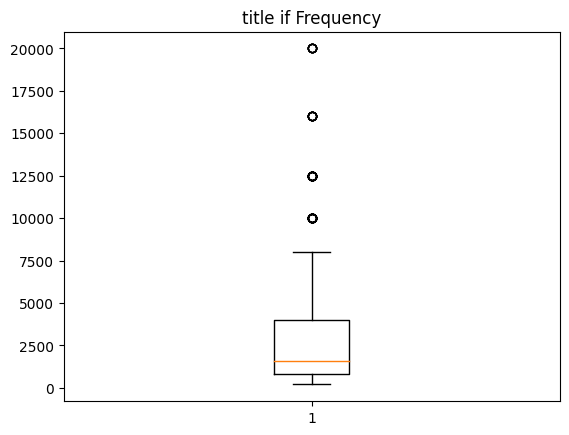

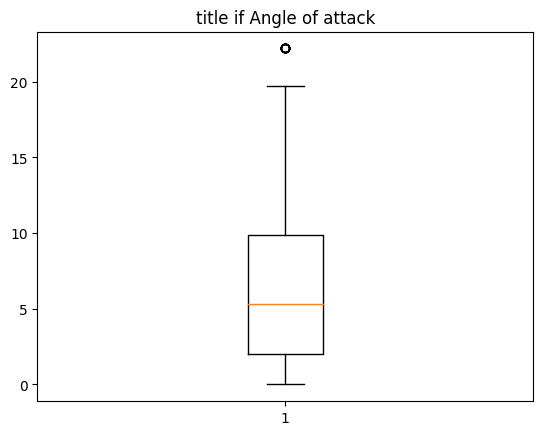

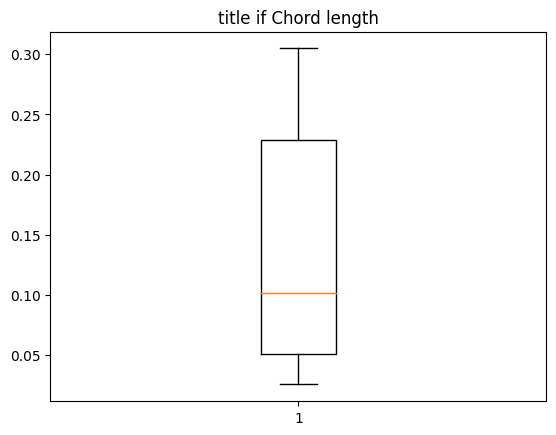

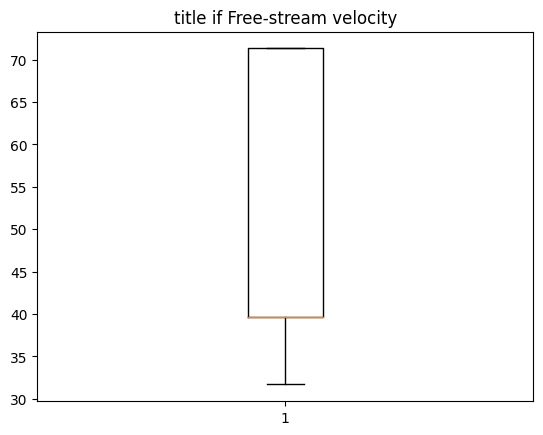

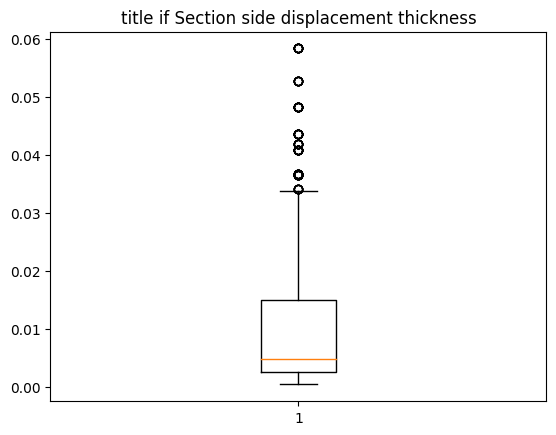

In [ ]:
for i in x_train.columns:

    plt.boxplot(x_train[i])
    plt.title(f"title if {i}")
    plt.show()

In [ ]:
x_m = []
x_s = []
z_score=[]
def fit(x_train):
        
        for feature in x_train.columns:
            x_m.append(np.mean(x_train[feature]))
            x_s.append(np.std(x_train[feature]))        
            z_score.append((x_train[feature]-np.mean(x_train[feature]))/np.std(x_train[feature]))
            


In [ ]:
from Airfoil_prediction.data_transformation import DataTransformation

: 

In [ ]:
x_m

[]

In [ ]:
df=simple_imputer.fit_transform(x)

In [ ]:
simple_imputer.feature_names_in_

array(['Frequency', 'Angle of attack', 'Chord length',
       'Free-stream velocity', 'Section side displacement thickness'],
      dtype=object)

In [ ]:
x.median()

Frequency                              1600.00000
Angle of attack                           5.30000
Chord length                              0.10160
Free-stream velocity                     39.60000
Section side displacement thickness       0.00485
dtype: float64

In [ ]:
class FeatureGenrator():

    def __init__(self ,strategy="median"):
        self.strategy=strategy

    def fit(self,x):

        self.feature_=x.columns
        self.statics_=[]
        for column in x.columns:
            self.statics_.append(x[column].median())


    def transform(self,x):

        for idx,value in enumerate(x.columns):
            x[value].fillna(self.statics_[idx])
        return x    
    def fit_transform(self,x):
        self.fit(x)
        return self.transform(x)


